# Updates: richer training and inference metrics

This repo now records per-epoch training metrics in `metrics/*_train_history.csv` and per-run inference rows with energy in the main CSVs. You can extend plots here to include:
- Loss/accuracy vs epoch per model
- Energy (J) vs engine/provider
- Throughput vs latency tradeoffs


# 04 · Results and Plots

Load all metrics CSVs and produce final comparative charts and tables (latency, throughput, energy, accuracy, trade-offs).
Figures go to reports/figs and tables to reports/tables.

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yaml

root = Path(__file__).resolve().parent.parent if '__file__' in globals() else Path(os.getcwd()).parent
cfg = yaml.safe_load(open(root / 'config/bench_matrix.yaml', 'r', encoding='utf-8'))
figs = root / cfg['outputs']['figures_dir'];
tables = root / cfg['outputs']['tables_dir']
figs.mkdir(parents=True, exist_ok=True);
tables.mkdir(parents=True, exist_ok=True)
# Load CSVs
train_csv = root / cfg['outputs']['train_csv']
infer_csv = root / cfg['outputs']['infer_csv']
df_train = pd.read_csv(train_csv) if train_csv.exists() else pd.DataFrame()
df_infer = pd.read_csv(infer_csv) if infer_csv.exists() else pd.DataFrame()
display(df_train.head())
display(df_infer.head())

,ts,exp_id,model,dataset,precision,engine,provider,batch,warmup,runs,...,torch_ver,ort_ver,ov_ver,driver_ver,model_hash,consistency_ok,max_abs_diff_torch_ort,max_abs_diff_torch_ov,top1_agree_torch_ort,top1_agree_torch_ov
0,2025-08-13T09:01:50.229533+00:00,train-baseline,cnn,cifar10,fp32,pytorch,CPU,64,10,100,...,NaN,NaN,NaN,NaN,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,NaN,NaN,NaN,NaN,NaN
1,2025-08-13T09:02:01.859424+00:00,train-baseline,cnn,cifar10,fp32,pytorch,CUDA,64,10,100,...,NaN,NaN,NaN,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,NaN,NaN,NaN,NaN,NaN
2,2025-08-13T09:06:06.567412+00:00,train-baseline,mlp,cifar10,fp32,pytorch,CPU,64,10,100,...,NaN,NaN,NaN,NaN,8ce0a2d8d3eb8bb63c0cbea362569a43cafabce0d01e62...,NaN,NaN,NaN,NaN,NaN
3,2025-08-13T09:06:18.052020+00:00,train-baseline,mlp,cifar10,fp32,pytorch,CUDA,64,10,100,...,NaN,NaN,NaN,580.97,8ce0a2d8d3eb8bb63c0cbea362569a43cafabce0d01e62...,NaN,NaN,NaN,NaN,NaN
4,2025-08-13T09:14:36.067952+00:00,train-baseline,mobilenetv3,cifar10,fp32,pytorch,CPU,64,10,100,...,NaN,NaN,NaN,NaN,77111869979b4227723fdbdefa354c009c843951df944c...,NaN,NaN,NaN,NaN,NaN


,ts,exp_id,model,dataset,precision,engine,provider,batch,warmup,runs,...,torch_ver,ort_ver,ov_ver,driver_ver,model_hash,consistency_ok,max_abs_diff_torch_ort,max_abs_diff_torch_ov,top1_agree_torch_ort,top1_agree_torch_ov
0,2025-08-13T09:52:23.778092+00:00,engines-bench,cnn,cifar10,fp32,pytorch,CPU,64,10,100,...,2.8.0+cu129,1.22.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,True,0.000006,0.000009,True,True
1,2025-08-13T09:52:34.995383+00:00,engines-bench,cnn,cifar10,fp32,pytorch,CUDA,64,10,100,...,2.8.0+cu129,1.22.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,False,0.000006,0.027887,True,True
2,2025-08-13T09:52:54.353132+00:00,engines-bench,cnn,cifar10,fp32,onnxruntime,CPU,64,10,100,...,2.8.0+cu129,1.22.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,NaN,NaN,NaN,NaN,NaN
3,2025-08-13T09:53:02.142054+00:00,engines-bench,cnn,cifar10,fp32,onnxruntime,CUDA,64,10,100,...,2.8.0+cu129,1.22.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,NaN,NaN,NaN,NaN,NaN
4,2025-08-13T09:53:13.244330+00:00,engines-bench,cnn,cifar10,fp32,openvino,CPU,64,10,100,...,2.8.0+cu129,1.22.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,NaN,NaN,NaN,NaN,NaN


## Summary tables

[NOTE] If any of the following tables looks empty, please run notebooks 01 and 02 first, then re-run this one.

In [2]:
# Best accuracy per model/engine/provider
if not df_infer.empty:
    g = (df_infer
         .groupby(['model', 'engine', 'provider'])
         .agg(acc=('acc', 'max'), lat_ms_mean=('lat_ms_mean', 'mean'), thr_ips=('thr_ips', 'mean'),
              energy_j=('energy_j', 'first')))
    display(g)
    g.reset_index().to_csv(tables / 'summary.csv', index=False)
else:
    print('No inference CSV found.')

acc  lat_ms_mean       thr_ips  \
model             engine      provider                                        
cnn               onnxruntime CPU       0.828125   116.850892    547.706559   
                              CUDA      0.828125     8.631571   7414.640974   
                  openvino    CPU       0.828125    23.317490   2744.720808   
                              GPU       0.828125     5.295112  12086.618751   
                              NPU       0.093750     2.391317  26763.494733   
                  pytorch     CPU       0.828125     9.907120   6460.000484   
                              CUDA      0.828125     2.890504  22141.467380   
efficientnetlite0 onnxruntime CPU       0.859375    26.766134   2391.081208   
                              CUDA      0.859375     5.943153  10768.694665   
                  openvino    CPU       0.859375    34.883484   1834.679128   
                              GPU       0.859375    16.224012   3944.770258   
                              NPU       0.093750     1.732092  36949.538464   
                  pytorch     CPU       0.859375    89.958407    711.439899   
                              CUDA      0.859375    12.049189   5311.560803   
mlp               onnxruntime CPU       0.546875    14.225378   4499.001714   
                              CUDA      0.546875     6.707603   9541.411438   
                  openvino    CPU       0.546875     7.132767   8972.674979   
                              GPU       0.546875    11.572127   5530.530386   
                              NPU       0.093750     4.559163  14037.664368   
                  pytorch     CPU       0.546875    16.279882   3931.232425   
                              CUDA      0.546875     1.171695  54621.723389   
mobilenetv3       onnxruntime CPU       0.781250     7.297911   8769.632843   
                              CUDA      0.781250     4.664178  13721.603249   
                  openvino    CPU       0.781250     9.381026   6822.281485   
                              GPU       0.781250     4.372141  14638.137244   
                              NPU       0.093750     1.235680  51793.344514   
                  pytorch     CPU       0.781250   240.112205    266.542053   
                              CUDA      0.781250    26.990276   2371.224362   

                                                  energy_j  
model             engine      provider                      
cnn               onnxruntime CPU                      N/D  
                              CUDA       9.059999999997672  
                  openvino    CPU                      N/D  
                              GPU                      N/D  
                              NPU                      N/D  
                  pytorch     CPU                      N/D  
                              CUDA      11.995000000024447  
efficientnetlite0 onnxruntime CPU                      N/D  
                              CUDA                  13.375  
                  openvino    CPU                      N/D  
                              GPU                      N/D  
                              NPU                      N/D  
                  pytorch     CPU                      N/D  
                              CUDA      1.2820000000065193  
mlp               onnxruntime CPU                      N/D  
                              CUDA       7.494999999995343  
                  openvino    CPU                      N/D  
                              GPU                      N/D  
                              NPU                      N/D  
                  pytorch     CPU                      N/D  
                              CUDA      10.764999999984866  
mobilenetv3       onnxruntime CPU                      N/D  
                              CUDA       7.328000000008615  
                  openvino    CPU                      N/D  
                              GPU                      N/D  
                           

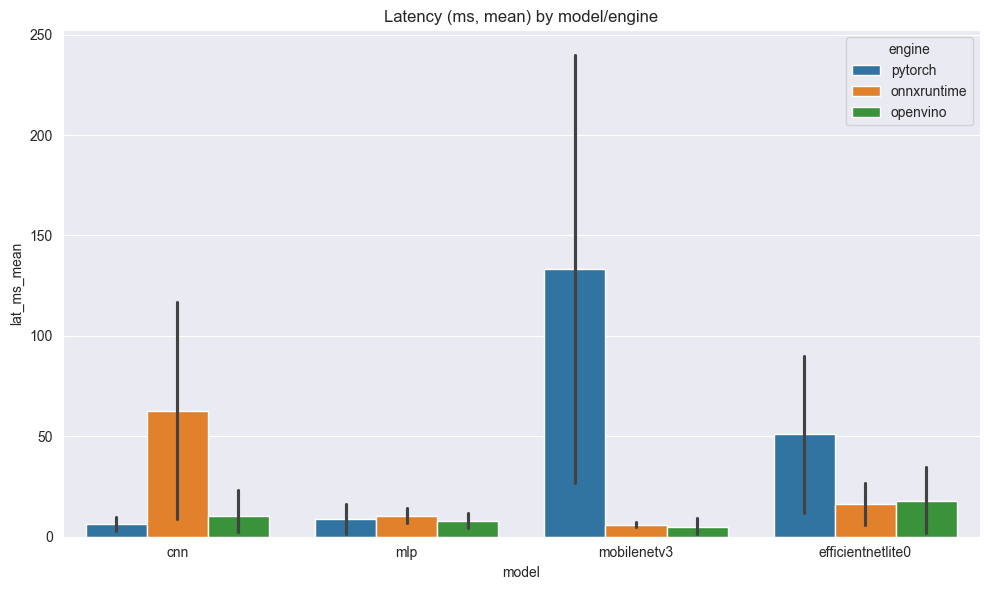

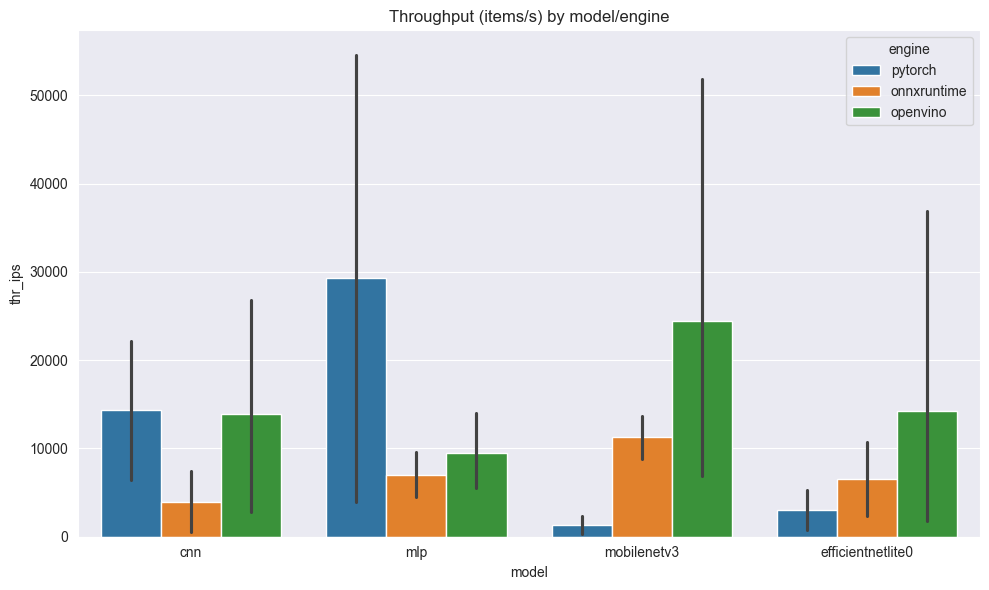

In [3]:
# Example plots: latency and throughput
if not df_infer.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(df_infer, x='model', y='lat_ms_mean', hue='engine')
    plt.title('Latency (ms, mean) by model/engine')
    plt.tight_layout();
    plt.savefig(figs / 'latency_by_engine.png', dpi=150);
    plt.show()
    plt.figure(figsize=(10, 6))
    sns.barplot(df_infer, x='model', y='thr_ips', hue='engine')
    plt.title('Throughput (items/s) by model/engine')
    plt.tight_layout();
    plt.savefig(figs / 'throughput_by_engine.png', dpi=150);
    plt.show()
else:
    print('No inference CSV found for plots.')

## Energy and trade-offs

[NOTE] Provide any missing device power data if available so we can enrich these plots.
We'll add Pareto trade-off charts (latency vs energy) in a future update.

## New plots: training curves and energy summaries

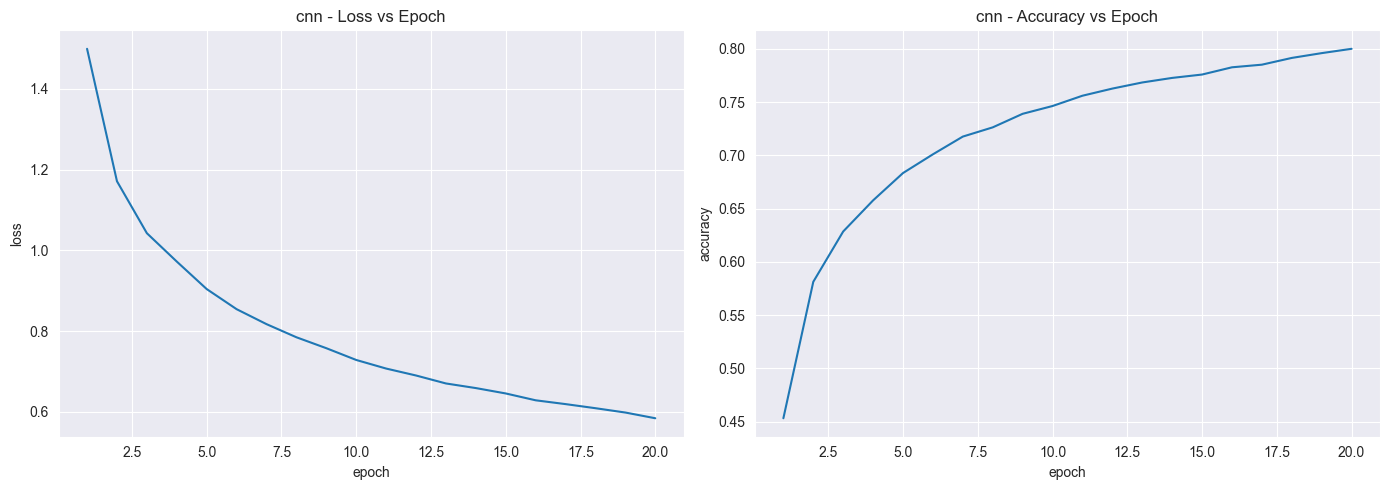

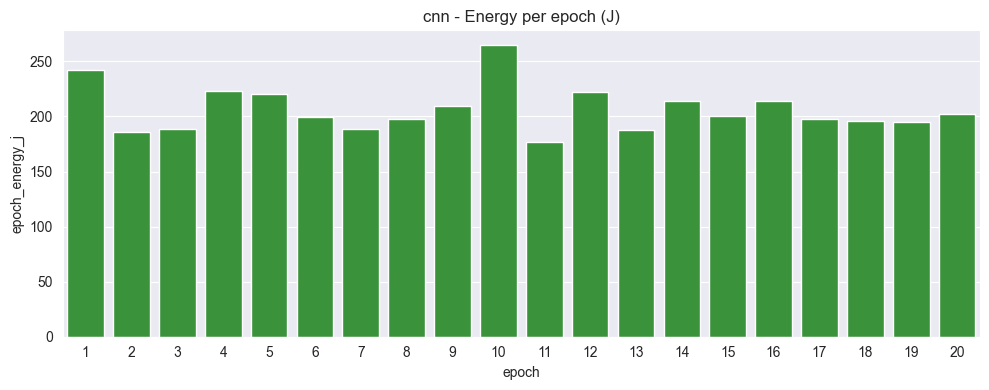

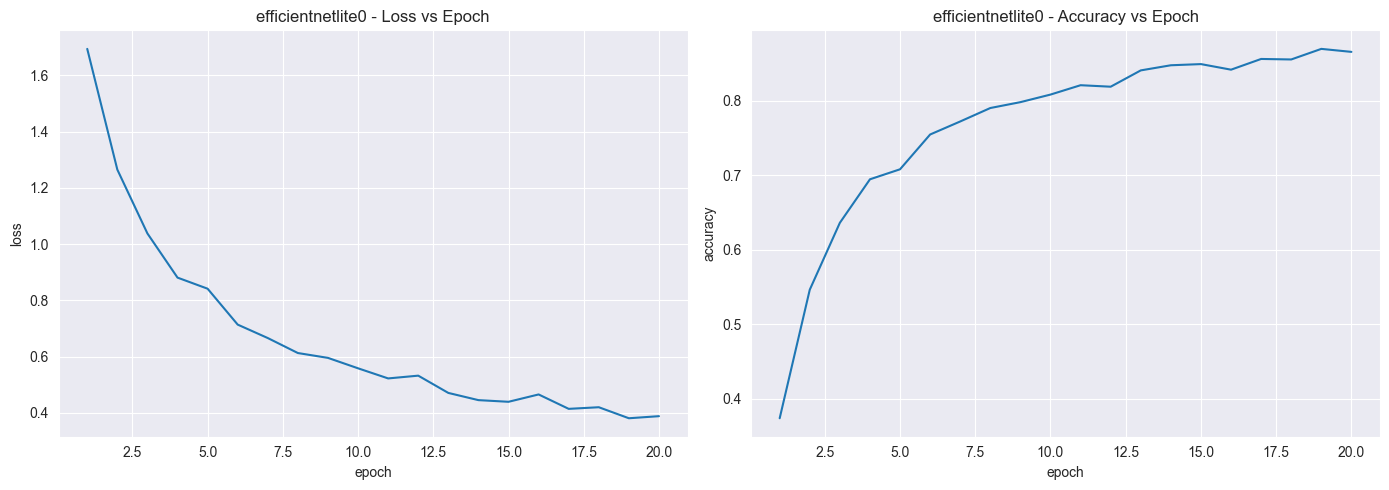

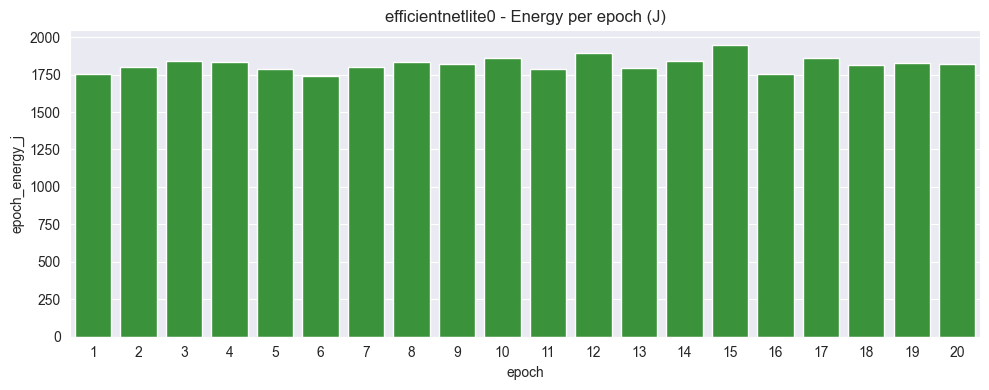

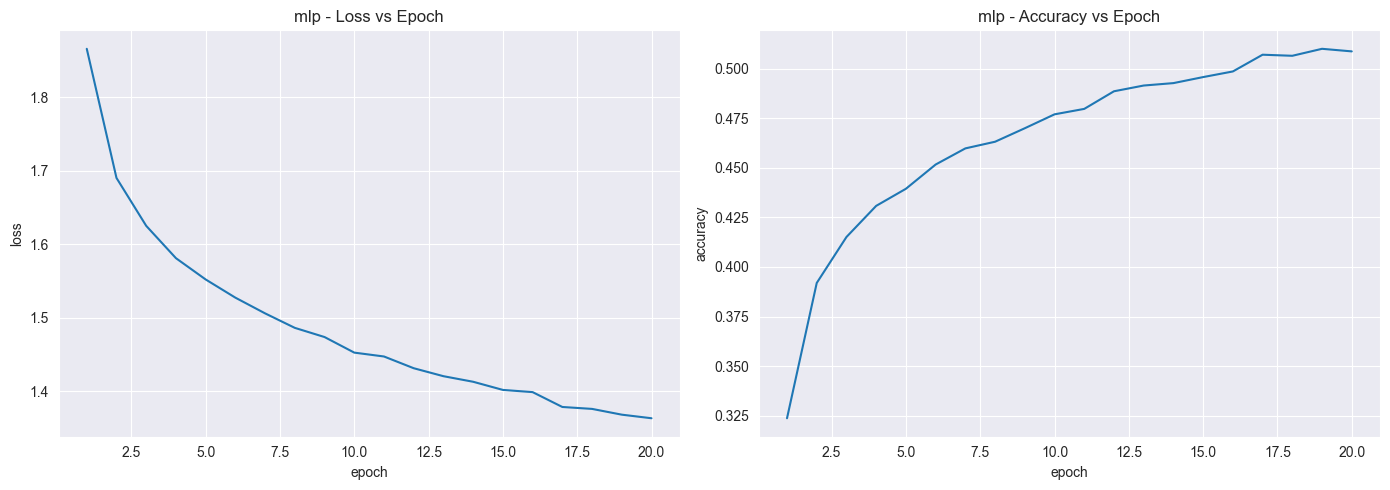

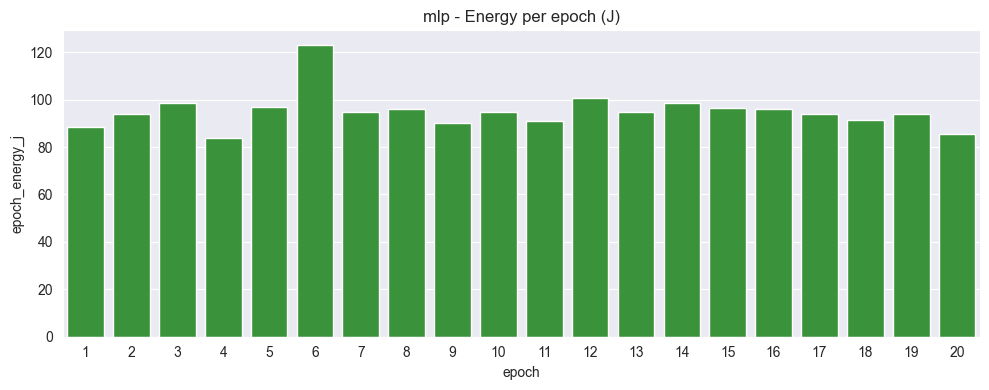

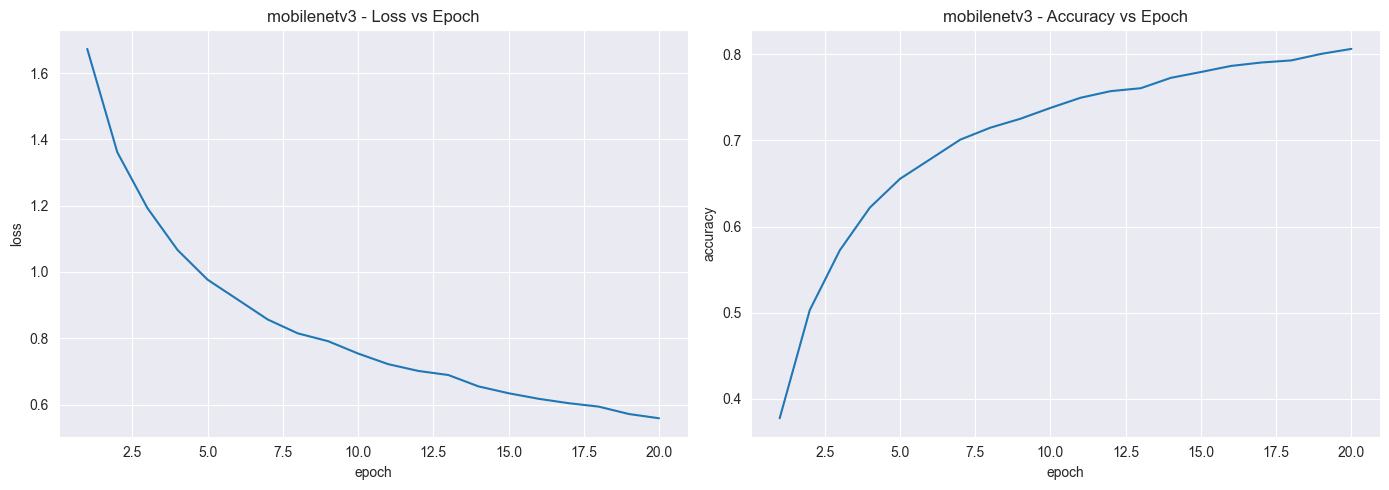

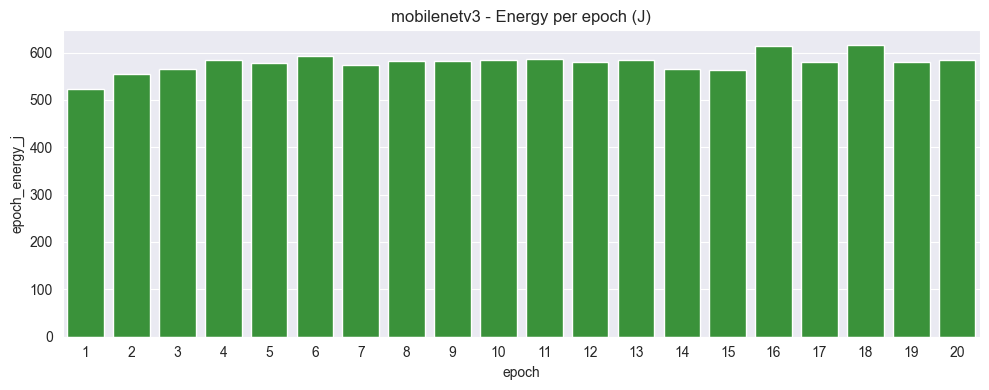

In [4]:
# Plot loss/accuracy vs epoch (per model) with optional energy-per-epoch bars
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics_dir = root / 'metrics'
train_hist_files = sorted(metrics_dir.glob('*_train_history.csv'))
if not train_hist_files:
    print('No train history CSVs found in metrics/.')
else:
    for f in train_hist_files:
        model = f.stem.replace('_train_history', '')
        dfh = pd.read_csv(f)
        if dfh.empty:
            continue
        # Loss/Acc shared x (epoch), dual chart
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        sns.lineplot(dfh, x='epoch', y='loss', ax=ax[0])
        ax[0].set_title(f'{model} - Loss vs Epoch')
        sns.lineplot(dfh, x='epoch', y='accuracy', ax=ax[1])
        ax[1].set_title(f'{model} - Accuracy vs Epoch')
        fig.tight_layout()
        fig.savefig(figs / f'{model}_train_curves.png', dpi=150)
        plt.show()
        # Energy-per-epoch bars (if present)
        if 'epoch_energy_j' in dfh.columns:
            plt.figure(figsize=(10, 4))
            sns.barplot(dfh, x='epoch', y='epoch_energy_j', color='tab:green')
            plt.title(f'{model} - Energy per epoch (J)')
            plt.tight_layout()
            plt.savefig(figs / f'{model}_energy_per_epoch.png', dpi=150)
            plt.show()

## Combined comparison: Loss and Accuracy per model

Two subplots are shown: left (Loss vs Epoch) and right (Accuracy vs Epoch), overlaying the curves of all four models. Below, a bar for each model with the total training energy consumption (sum of energy per epoch) if available in the CSVs.


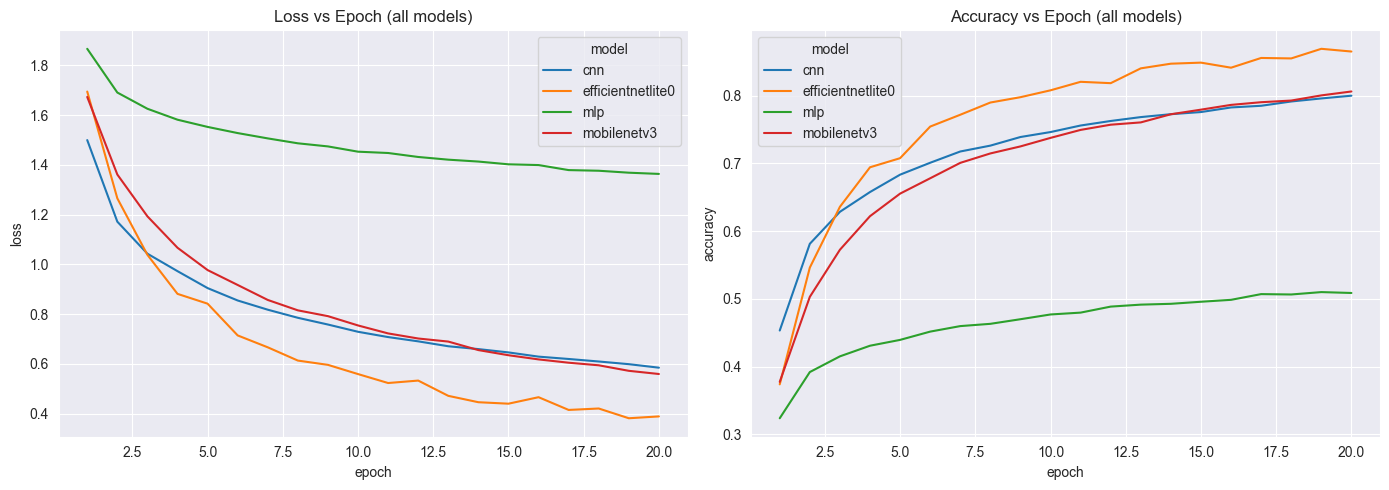

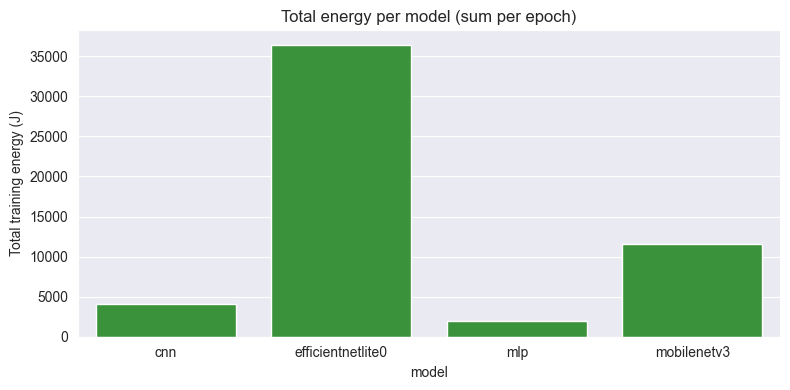

In [5]:
# Combined Loss/Accuracy across models + total training energy per model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics_dir = root / 'metrics'
train_hist_files = sorted(metrics_dir.glob('*_train_history.csv'))

# Load all histories with a model column
dfs = []
for f in train_hist_files:
    try:
        dfh = pd.read_csv(f)
        if dfh.empty or 'epoch' not in dfh.columns:
            continue
        model = f.stem.replace('_train_history', '')
        dfh['model'] = model
        dfs.append(dfh)
    except Exception:
        pass

if not dfs:
    print('No train history CSVs found in metrics/.')
else:
    dfa = pd.concat(dfs, ignore_index=True)
    # Plot combined curves
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    sns.lineplot(dfa, x='epoch', y='loss', hue='model', ax=ax[0])
    ax[0].set_title('Loss vs Epoch (all models)')
    sns.lineplot(dfa, x='epoch', y='accuracy', hue='model', ax=ax[1])
    ax[1].set_title('Accuracy vs Epoch (all models)')
    fig.tight_layout()
    fig.savefig(figs / 'combined_train_curves.png', dpi=150)
    plt.show()

    # Total energy per model (sum of epoch_energy_j when present)
    if 'epoch_energy_j' in dfa.columns:
        energy_tot = (dfa.dropna(subset=['epoch_energy_j'])
                      .groupby('model')['epoch_energy_j']
                      .sum()
                      .reset_index())
        if not energy_tot.empty:
            plt.figure(figsize=(8, 4))
            sns.barplot(energy_tot, x='model', y='epoch_energy_j', color='tab:green')
            plt.ylabel('Total training energy (J)')
            plt.title('Total energy per model (sum per epoch)')
            plt.tight_layout()
            plt.savefig(figs / 'total_train_energy_by_model.png', dpi=150)
            plt.show()
        else:
            print('No energy per epoch data available to calculate sums.')
    else:
        print('No epoch_energy_j column; total energy bar not generated.')


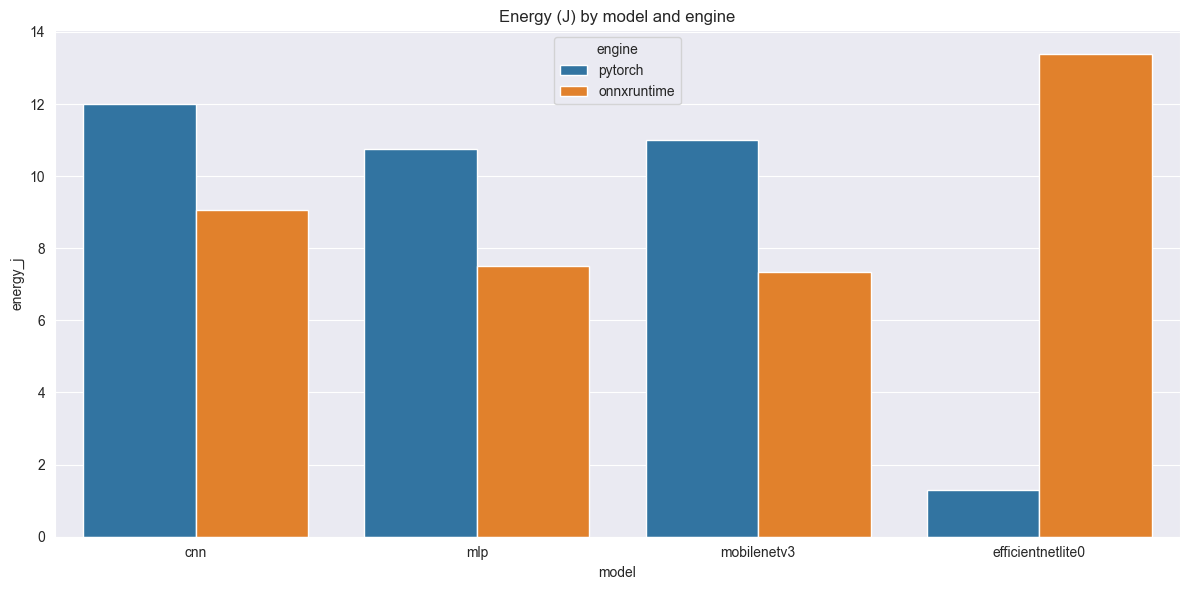

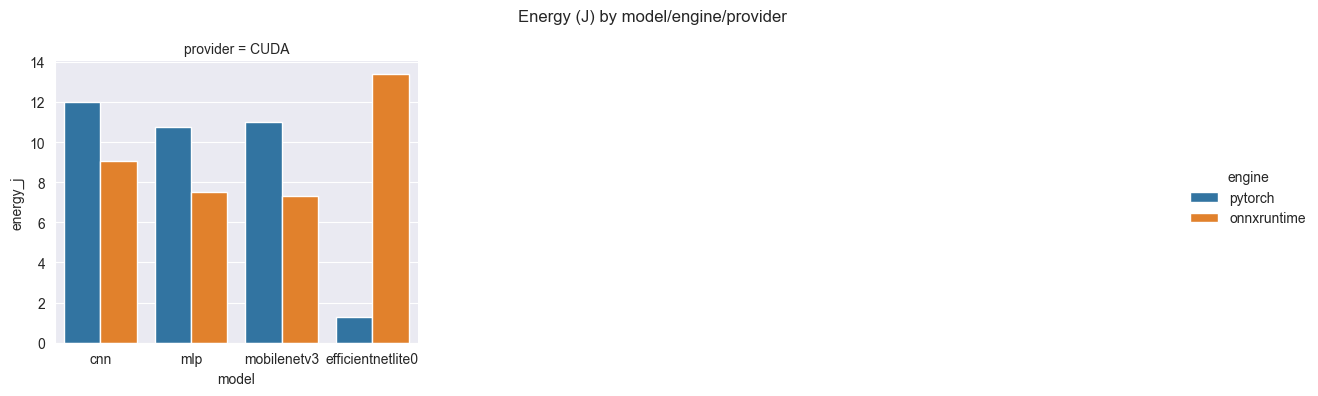

In [6]:
# Energy vs engine/provider
energy_csv = root / 'metrics' / 'inference_energy_summary.csv'
try:
    if energy_csv.exists():
        dfe = pd.read_csv(energy_csv)
    else:
        # derive quickly from df_infer if energy column exists
        if 'df_infer' in globals() and not df_infer.empty:
            dfe = df_infer[df_infer['energy_j'].astype(str) != 'N/D'][
                ['model', 'engine', 'provider', 'energy_j']].copy()
        else:
            dfe = pd.DataFrame()
    if dfe.empty:
        print('No energy data available for plots.')
    else:
        plt.figure(figsize=(12, 6))
        sns.barplot(dfe, x='model', y='energy_j', hue='engine')
        plt.title('Energy (J) by model and engine')
        plt.tight_layout()
        plt.savefig(figs / 'energy_by_engine.png', dpi=150)
        plt.show()
        # Facet by provider for extra granularity
        g = sns.catplot(dfe, x='model', y='energy_j', hue='engine', col='provider', kind='bar', col_wrap=3, height=4)
        g.fig.subplots_adjust(top=0.85)
        g.fig.suptitle('Energy (J) by model/engine/provider')
        g.savefig(figs / 'energy_by_engine_provider.png', dpi=150)
        plt.show()
except Exception as ex:
    print(f'Energy plots failed: {ex}')